In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')


In [3]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


What does the distribution of petal lengths look like?
Is there a correlation between petal length and petal width?
Would it be reasonable to predict species based on sepal width and sepal length?
Which features would be best used to predict species?

Text(6.674999999999997, 0.5, 'Petal Width')

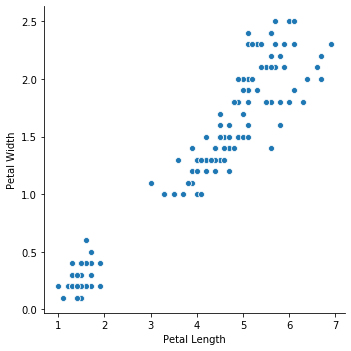

In [7]:
sns.relplot(x='petal_length', y='petal_width', data=iris)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [8]:
anscombe = sns.load_dataset('anscombe')

In [9]:
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [10]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


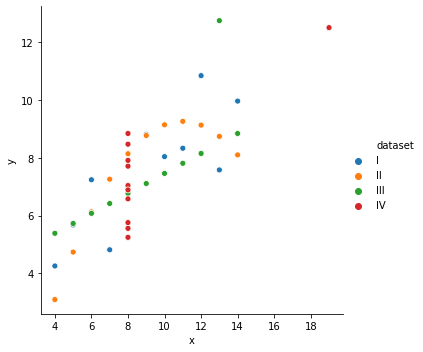

In [12]:
sns.relplot(x='x', y='y', hue="dataset",data=anscombe)

 Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?